**Exercise 6.2**

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

import ed

In [2]:
L, g, J = 14, 1.5, 1.
sx_list, sz_list = ed.gen_sx_list(L), ed.gen_sz_list(L)
H = ed.gen_hamiltonian(sx_list, sz_list, g, J)
_, vecs = sp.sparse.linalg.eigsh(H, which='SA')
psi0 = vecs[:, 0]

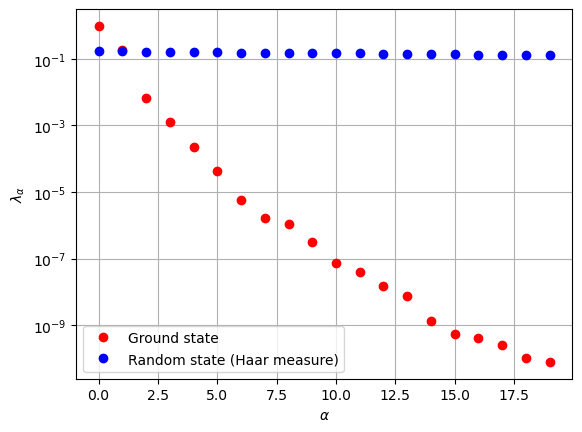

In [3]:
psi0_ab = psi0.reshape(2**(L//2), 2**(L//2))
_, s0, _ = sp.linalg.svd(psi0_ab, full_matrices=False)

psi_random = np.random.normal(size=psi0.shape) + 1.j * np.random.normal(size=psi0.shape)
psi_random /= np.linalg.norm(psi_random)
psi_random_ab = psi_random.reshape(2**(L//2), 2**(L//2))
_, s_random, _ = sp.linalg.svd(psi_random_ab, full_matrices=False)

fig, ax = plt.subplots(1, 1)
ax.plot(s0[:20], 'ro', label='Ground state')
ax.plot(s_random[:20], 'bo', label='Random state (Haar measure)')
ax.set_yscale('log')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\lambda_{\\alpha}$')
ax.legend()
ax.grid()

In [4]:
def entropy(s):
    s = np.asarray(s)
    s = s[s > 1.e-20] # banish numerical rounding errors giving (small) negative S[alpha]; true since  x log(x) -> 0 for x -> 0.
    s2 = s**2
    return - np.sum(s2 * np.log(s2))

In [5]:
Ls = [6, 8, 10, 12, 14]
S_random = []
S_gs = dict((g, []) for g in [0.1, 0.5, 1., 1.5, 4.])
for L in Ls:

    sx_list = ed.gen_sx_list(L)
    sz_list = ed.gen_sz_list(L)
    for g in S_gs:

        H = ed.gen_hamiltonian(sx_list, sz_list, g, J)
        _, vecs = sp.sparse.linalg.eigsh(H, which='SA')
        psi0 = vecs[:, 0]
        psi0_ab = np.reshape(psi0, (2**(L//2), 2**(L//2)))
        _, s0, _ = sp.linalg.svd(psi0_ab, full_matrices=False)
        S_gs[g].append(entropy(s0))
    
    psi_random = np.random.normal(size=psi0.shape) + 1.j * np.random.normal(size=psi0.shape)
    psi_random /= np.linalg.norm(psi_random)
    psi_random_ab = psi_random.reshape(2**(L//2), 2**(L//2))
    _, s_random, _ = sp.linalg.svd(psi_random_ab, full_matrices=False)
    S_random.append(entropy(s_random))

In [6]:
S_page = [L/2*np.log(2)-0.5 for L in Ls]

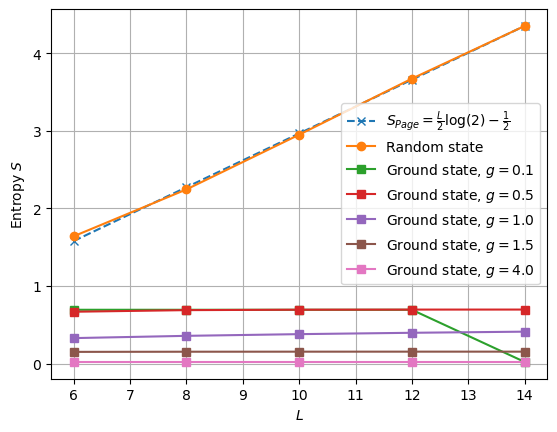

In [7]:
fig, ax = plt.subplots(1, 1)   
ax.plot(Ls, S_page,'--' ,marker='x', label='$S_{Page} = \\frac{L}{2} \log(2) - \\frac{1}{2}$')
ax.plot(Ls, S_random, marker='o', label='Random state')
for g in S_gs.keys():
    ax.plot(Ls, S_gs[g], marker='s', label="Ground state, $g={g:.1f}$".format(g=g))
ax.set_xlabel('$L$'), ax.set_ylabel('Entropy $S$'), ax.legend(),ax.grid();